In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../DataAccess/Datasets/flights.csv')

In [3]:
df.head(20)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [5]:
invalid_diverted_flights = df[(df['DIVERTED']==1)
                              & df['ARRIVAL_TIME'].isna()]

print(f'invalid_diverted_flights count : {invalid_diverted_flights.count()[1]}')
print(f'df count : {df.count()[1]}')
df = df.drop(invalid_diverted_flights.index)
print(f'df count after deleting : {df.count()[1]}')


invalid_diverted_flights count : 2629
df count : 5819079
df count after deleting : 5816450


In [6]:
# Replace related fields to null when a flight is cancelled
df.loc[(df['CANCELLED']) == 1, ['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']] = None

In [7]:
# STATUS = map(lambda x: 1 if x > 5 else 0, df['ARRIVAL_DELAY'])
# df['STATUS'] = list(STATUS)
df['STATUS'] = list(map(lambda x: 1 if pd.notna(x) and x > 5 else 0, df['ARRIVAL_DELAY']))

In [8]:
# STATUS_2 = df['ARRIVAL_DELAY'].apply(lambda x : 1 if x > 5 else 0)
# df['STATUS_2'] = STATUS_2
# df = df.drop('STATUS_2', axis=1)

In [9]:
df_flight_status_type = df.groupby('STATUS').size()
df_flight_status_type

STATUS
0    4223375
1    1593075
dtype: int64

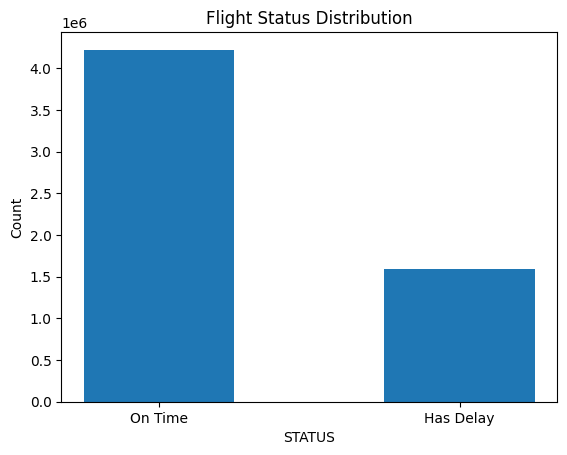

In [10]:
label=['On Time', 'Has Delay']

plt.Figure(figsize=(6,4))
plt.bar(label, df_flight_status_type, width=0.5)
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.title('Flight Status Distribution')
plt.show()

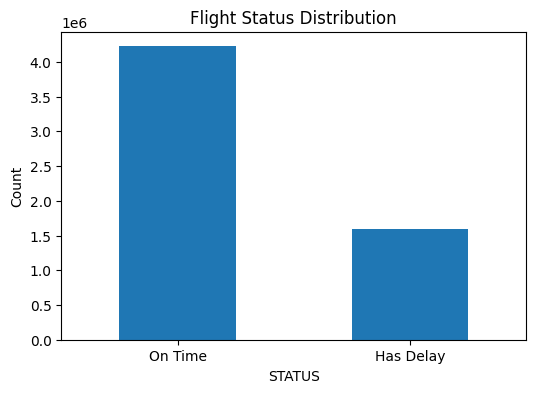

In [11]:
df['STATUS'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('STATUS')
plt.ylabel('Count')
plt.title('Flight Status Distribution')
plt.xticks(ticks=[0,1], labels=label, rotation=0)
plt.show()

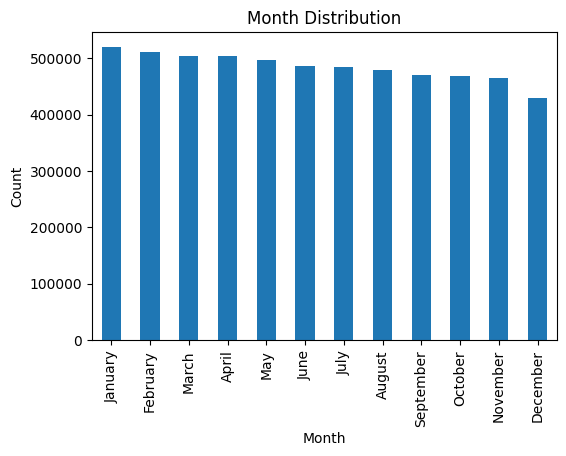

In [12]:
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month = list(range(0, 12))

df['MONTH'].value_counts().plot(kind='bar', figsize=(6,4))
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Distribution')
plt.xticks(ticks=month, labels=month_list)
plt.show()

In [13]:
print(df['STATUS'].unique())
print(df[['MONTH', 'YEAR']].isna().sum())

print(df[df['STATUS'] == 0].shape)
print(df[df['STATUS'] == 1].shape)

[0 1]
MONTH    0
YEAR     0
dtype: int64
(4223375, 32)
(1593075, 32)


In [14]:
columns=['YEAR', 'MONTH', 'DIVERTED', 'CANCELLED']
df_statistics = df[columns].groupby(['YEAR', 'MONTH']).sum()
total_count = df.groupby(['YEAR', 'MONTH']).size()
# ontime_flights = df[df['STATUS'] == 0].groupby(['MONTH', 'YEAR']).size()
# delayed_flight = df[df['STATUS'] == 1].groupby(['MONTH', 'YEAR']).size()

df_statistics['TOTAL_COUNT'] = total_count
# df_statistics['ONTIME_FLIGHTS'] = ontime_flights
# df_statistics['DEALYED_FLIGHTS'] = delayed_flight
df_statistics['ROUTINE_FLIGHTS'] = df_statistics['TOTAL_COUNT'] - df_statistics['DIVERTED'] - df_statistics['CANCELLED']

df_statistics

DIVERTED  CANCELLED  TOTAL_COUNT  ROUTINE_FLIGHTS
YEAR MONTH                                                   
2015 1           684      11982       469679           457013
     2           706      20517       428886           407663
     3           899      11002       504039           492138
     4          1192       4520       484963           479251
     5          1432       5694       496767           489641
     6          1661       9120       503628           492847
     7          1387       4806       520577           514384
     8          1362       5052       510370           503956
     9           671       2075       464899           462153
     10          716       2454       486048           482878
     11          788       4599       467754           462367
     12         1060       8063       478840           469717

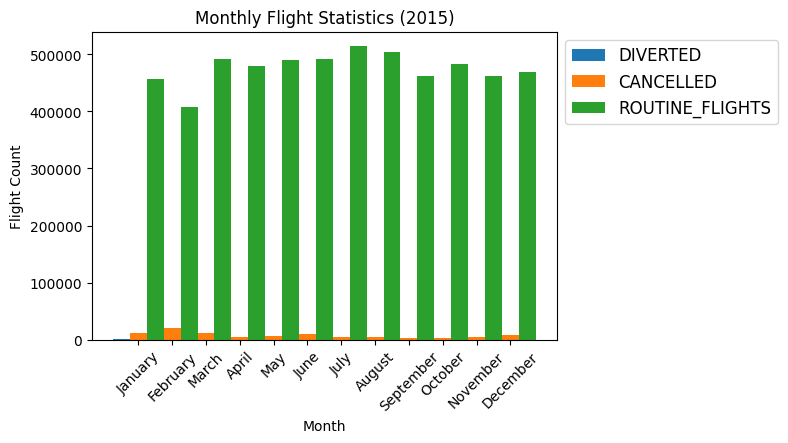

In [15]:
columns_to_plot = ['DIVERTED', 'CANCELLED', 'ROUTINE_FLIGHTS']
x = np.arange(len(df_statistics))  # [0, 1, 2, ..., 11]
print
bar_width = 0.5

plt.figure(figsize=(6,4))
for i, col in enumerate(columns_to_plot):
    plt.bar(x + i * bar_width, df_statistics[col], width=bar_width, label=col)

plt.xlabel('Month')
plt.ylabel('Flight Count')
plt.title('Monthly Flight Statistics (2015)')
plt.xticks(x + bar_width, month_list, rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
plt.show()

In [16]:
# df_test = df.groupby(['YEAR', 'MONTH'])[['MONTH', 'DIVERTED', 'CANCELLED']].sum().reset_index()
# df_test.plot(x=x, kind='bar', figsize=(10, 5))
# plt.title('Monthly Flight Statistics')
# plt.xlabel('Month')
# plt.ylabel('Flight Count')
# plt.legend()
# plt.show()

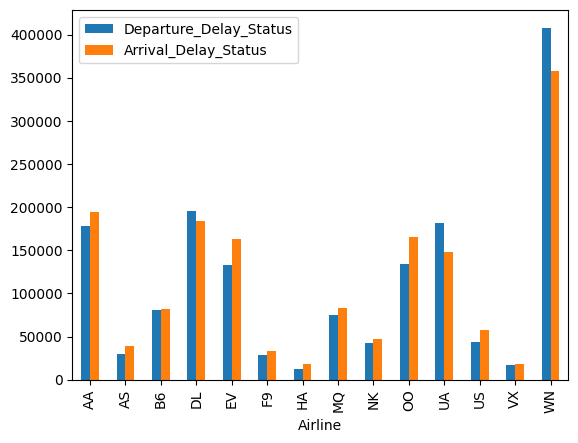

In [17]:
df_delay = pd.DataFrame({'Month': df['MONTH'],
                         'Airline': df['AIRLINE'],
                         'Departure_Delay': df['DEPARTURE_DELAY'],
                         'Arrival_Delay': df['ARRIVAL_DELAY'],
                         'Departure_Delay_Status': df['DEPARTURE_DELAY'].apply(lambda x: 1 if x > 5 else 0),
                         'Arrival_Delay_Status': df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 5 else 0)                         
                         })

delay_count = df_delay.groupby('Airline') [['Departure_Delay_Status', 'Arrival_Delay_Status']].sum()
delay_count.plot(kind='bar')
plt.show()

# df_delay = pd.DataFrame({'Year': df['YEAR'], 
#                          'Month': df['MONTH'],
#                          'Airline': df['IATA_CODE'],
#                          'Departure_Delay_Min': df['DEPARTURE_DELAY'],
#                          'Arrival_Delay_Min': df['ARRIVAL_DELAY'],
#                          'Departure_Delay': np.where(df['DEPARTURE_DELAY'] > 0, 1, 0),
#                          'Arrival_Delay': np.where(df['ARRIVAL_DELAY'] > 0, 1, 0)                         
#                         })

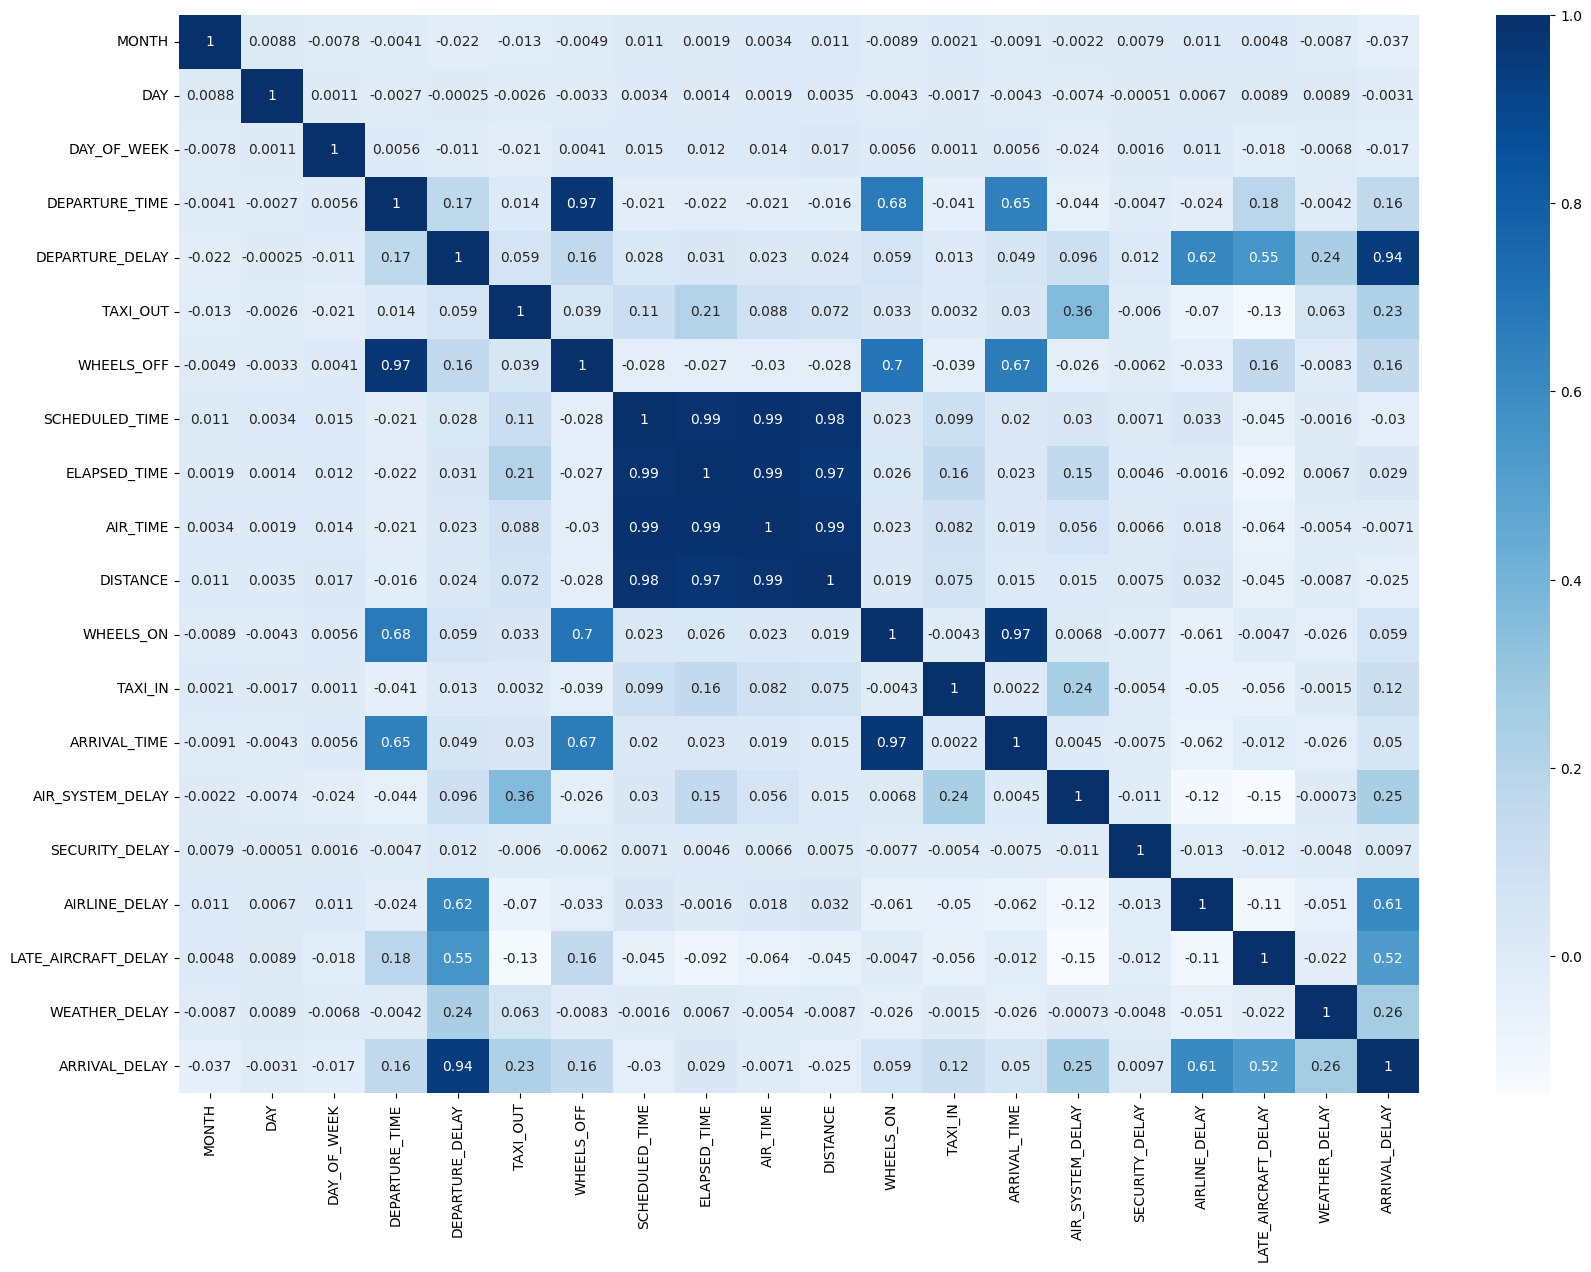

In [18]:
df_corr = df[['MONTH', 'DAY', 'DAY_OF_WEEK', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
              'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME', 
              'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'ARRIVAL_DELAY']]
df_corr.corr()

plt.figure(figsize=(20,14))
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True)
plt.show()

In [19]:
# For this project just Routine flight are considered. The CANCELLED and DIVERTED flights are dropped from the dataset.
df = df[(df['CANCELLED'] == 0) & (df['DIVERTED'] == 0)]

## Prediction

### 1- Machine Leraning

In [20]:
import logging
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from  sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
logger = logging.getLogger(__name__)

In [22]:
# Define the function to convert integer to time format
def int_to_hours(value):
    if pd.isna(value) or value == None or value == '':
        return None
    value = int(float(value))
    number_str = str(int(value))
    number_str = number_str.rjust(4, '0')
    hours, minutes = [number_str[:2], number_str[2:]]
    #return f'{hours}:{minutes}'
    return '{:02d}:{:02d}:00'.format(int(hours), int(minutes))


# # Define the function to convert integer to time format
# def int_to_time(value):
#     if pd.isna(value) or value == '':
#         return ''  # Return empty string for NaN values
#     hours = int(value) // 100
#     minutes = int(value) % 100
#     return '{:02d}:{:02d}:00'.format(hours, minutes)

In [23]:
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].apply(int_to_hours)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].apply(int_to_hours)
df['SCHEDULED_ARRIVAL'] = df['SCHEDULED_ARRIVAL'].apply(int_to_hours)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].apply(int_to_hours)

In [24]:
def get_dataset(X, y):
    # Normalization
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # This gives 60% train, 20% validation, 20% test
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, shuffle=True)

    print(f'train shape: {X_train.shape, y_train.shape}')
    print(f'test shape: {X_test.shape, y_test.shape}')
    print(f'validation shape: {X_val.shape, y_val.shape}\n')

    logger.info("Splitting the data is done.")
    return [X_train, y_train, X_val, y_val, X_test, y_test]


In [25]:
def evaluate(y_train, y_test, y_pred_train, y_pred_test):
    MSE = mean_squared_error(y_test, y_pred_test)
    MAE = mean_absolute_error(y_test, y_pred_test)
    R2_Score_train = r2_score(y_train, y_pred_train)
    R2_Score_test = r2_score(y_test, y_pred_test)

    print(f'MSE: {MSE:.2f}')
    print(f'MAE: {MAE:.2f}')
    print(f'R2_Score: {R2_Score_train:.4f}')
    print(f'R2_Score: {R2_Score_test:.4f}\n')
    
    logger.info("Evaluation is done.")
    # return{'MSE': MSE, 'MAE': MAE, 'R2_Score': R2_Score}
    return [MSE, MAE, R2_Score_train, R2_Score_test]

In [27]:
import sys, os 
sys.path.append(os.path.abspath(".."))

from core.enum import ModelTypeEnum
from core import model_manager

In [28]:

def create_regression_model(X_train, y_train, X_val, y_val, model_type: ModelTypeEnum):
    try:
        model_type = ModelTypeEnum(model_type)

        logger.info(f"Model {model_type.name} is started to generate.")
        # X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(X, y)

        # Model geneartion
        match model_type:
            case 1 | 2:            
                model = LinearRegression()
            case 3:
                model = Lasso(alpha = 1.0)
            case 4:
                model = Ridge(alpha = 1.0)

        model.fit(X_train, y_train)

        # Prediction
        y_pred_train = model.predict(X_train)
        y_pred_val = model.predict(X_val)

        coef = model.coef_
        intercept = model.intercept_
        print(f'coef: {coef}')
        print(f'intercept: {intercept}\n')

        # Evaluation
        MSE, MAE, R2_Score_train, R2_Score_test = evaluate(y_train, y_val, y_pred_train, y_pred_val)
        result_str = f'Training completed with {MSE:.4f}'
        logger.info(result_str)
        MSE_round = round(MSE, 2)

        # Saving Model
        model_path = model_manager.save_model(model, model_type.name, MSE_round)
        model_manager.register_model(model_path, MSE)

        result = {
                  'model' : model,
                  'coef' : coef,
                  'intercept' : intercept,
                  'y_pred_train' : y_pred_train,
                  'y_pred_val' : y_pred_val,
                  'MSE' : MSE,
                  'MAE' : MAE,
                  'R2_Score': R2_Score_test
                  }
        return result
    except Exception as ex:
        logger.error("Training failed due to an exception", exc_info=True)
        return {'code' : -1, 'result' : None}


In [29]:
def create_plot(X_val, y_val, y_pred_val):
    shape = X_val.shape[1]
    
    plt.Figure(figsize=(6,4))

    if shape == 1:        
        plt.scatter(X_val, y_val, alpha=0.5, color='blue', label="Predicted")
        plt.plot(X_val, y_pred_val, color='red', linestyle='--', lw=2, label="Ideal Fit Line")
    else:
        plt.scatter(y_val, y_pred_val, alpha=0.5, color='blue', label="Predicted")
        plt.plot([y_val.min(), y_val.max()],[y_val.min(), y_val.max()], color='red', linestyle='--', lw=2, label="Ideal Fit Line")

    plt.xlabel('Actual Arrival Delay')
    plt.ylabel('Predicted Arrival Delay')
    plt.legend()
    plt.show()

### Linear Regression

In [34]:
df[df['DEPARTURE_DELAY'] == 5][['DEPARTURE_DELAY','ARRIVAL_DELAY']]


,DEPARTURE_DELAY,ARRIVAL_DELAY
78,5.0,3.0
118,5.0,-7.0
195,5.0,-11.0
253,5.0,-19.0
266,5.0,-1.0
...,...,...
5818899,5.0,-38.0
5818901,5.0,4.0
5818932,5.0,-2.0
5818971,5.0,-28.0


In [35]:
features = ['DEPARTURE_DELAY']

X = df[features]
y = df['ARRIVAL_DELAY']

X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(X, y)
result = create_regression_model(X_train, y_train, X_val, y_val, 1)

train shape: ((3428404, 1), (3428404,))
test shape: ((1142802, 1), (1142802,))
validation shape: ((1142802, 1), (1142802,))

coef: [37.09666089]
intercept: 4.413466489921253

MSE: 166.08
MAE: 9.06
R2_Score: 0.8922
R2_Score: 0.8936



In [36]:
y_pred_val = result.get('y_pred_val')

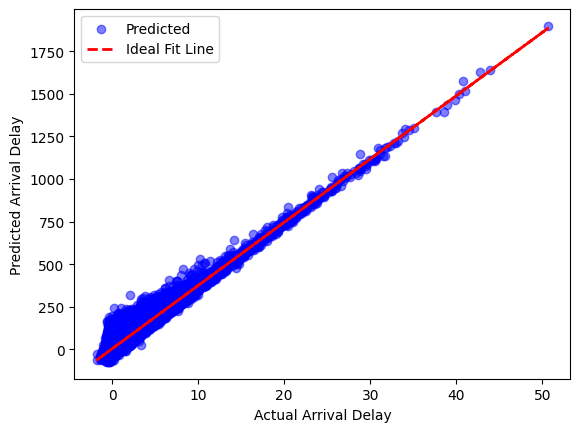

In [37]:
create_plot(X_val, y_val, y_pred_val)

### Multiple Linear Regression

In [44]:
X_test

array([[-0.83208243, -0.84901341, -0.88820116, -0.08931599],
       [ 0.2062608 ,  0.20204279,  0.30679593, -0.2248551 ],
       [-0.25047879, -0.33696039, -0.35709134, -0.03510034],
       ...,
       [-0.79265167, -0.74121277, -0.80853468, -0.17063946],
       [ 1.75391795,  1.29352423,  1.44868203, -0.30617857],
       [-0.16997433, -0.32348531, -0.29070261, -0.11642381]])

In [45]:
df[['DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'DEPARTURE_DELAY', "ARRIVAL_DELAY"]]

,DISTANCE,ELAPSED_TIME,SCHEDULED_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,1448,194.0,205.0,-11.0,-22.0
1,2330,279.0,280.0,-8.0,-9.0
2,2296,293.0,286.0,-2.0,5.0
3,2342,281.0,285.0,-5.0,-9.0
4,1448,215.0,235.0,-1.0,-21.0
...,...,...,...,...,...
5819074,2611,298.0,320.0,-4.0,-26.0
5819075,1617,215.0,227.0,-4.0,-16.0
5819076,1598,222.0,221.0,-9.0,-8.0
5819077,1189,157.0,161.0,-6.0,-10.0


In [38]:
features = ['DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'DEPARTURE_DELAY']

X = df[features]
y = df['ARRIVAL_DELAY']

X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(X, y)
result = create_regression_model(X_train, y_train, X_val, y_val, 2)

train shape: ((3428404, 4), (3428404,))
test shape: ((1142802, 4), (1142802,))
validation shape: ((1142802, 4), (1142802,))

coef: [-3.34817813e-12  7.42110652e+01 -7.53139912e+01  3.68897205e+01]
intercept: 4.407057007970951

MSE: 0.00
MAE: 0.00
R2_Score: 1.0000
R2_Score: 1.0000



In [ ]:
y_pred_val = result.get('y_pred_val')

In [ ]:
y_pred_val = result.get('y_pred_val')
create_plot(X_val, y_val, y_pred_val)

### Using Lasso

In [ ]:
features = ['DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'DEPARTURE_DELAY']

X = df[features]
y = df['ARRIVAL_DELAY']

X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(X, y)
result = create_regression_model(X_train, y_train, X_val, y_val, 3)

In [ ]:
y_pred_val = result.get('y_pred_val')

In [ ]:
y_pred_val = result.get('y_pred_val')
create_plot(X_val, y_val, y_pred_val)

### Using Ridge

In [ ]:
features = ['DISTANCE', 'ELAPSED_TIME', 'SCHEDULED_TIME', 'DEPARTURE_DELAY']

X = df[features]
y = df['ARRIVAL_DELAY']

X_train, y_train, X_val, y_val, X_test, y_test = get_dataset(X, y)
result = create_regression_model(X_train, y_train, X_val, y_val, 4)

In [ ]:
y_pred_val = result.get('y_pred_val')

In [ ]:
y_pred_val = result.get('y_pred_val')
create_plot(X_val, y_val, y_pred_val)